# External modules

In [15]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




# Internal functions

In [2]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [3]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [7]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = "./03_application_flow_wind_O/flow.txt", header = FALSE, sep = " "))

In [8]:
str(data)

'data.frame':	45028 obs. of  3 variables:
 $ V1: chr  "01/01/1920" "02/01/1920" "03/01/1920" "04/01/1920" ...
 $ V2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ V3: num  4420 4160 4230 4150 4120 3840 3660 3460 3240 3000 ...


In [9]:
x_raw <- data$V3

# Data description

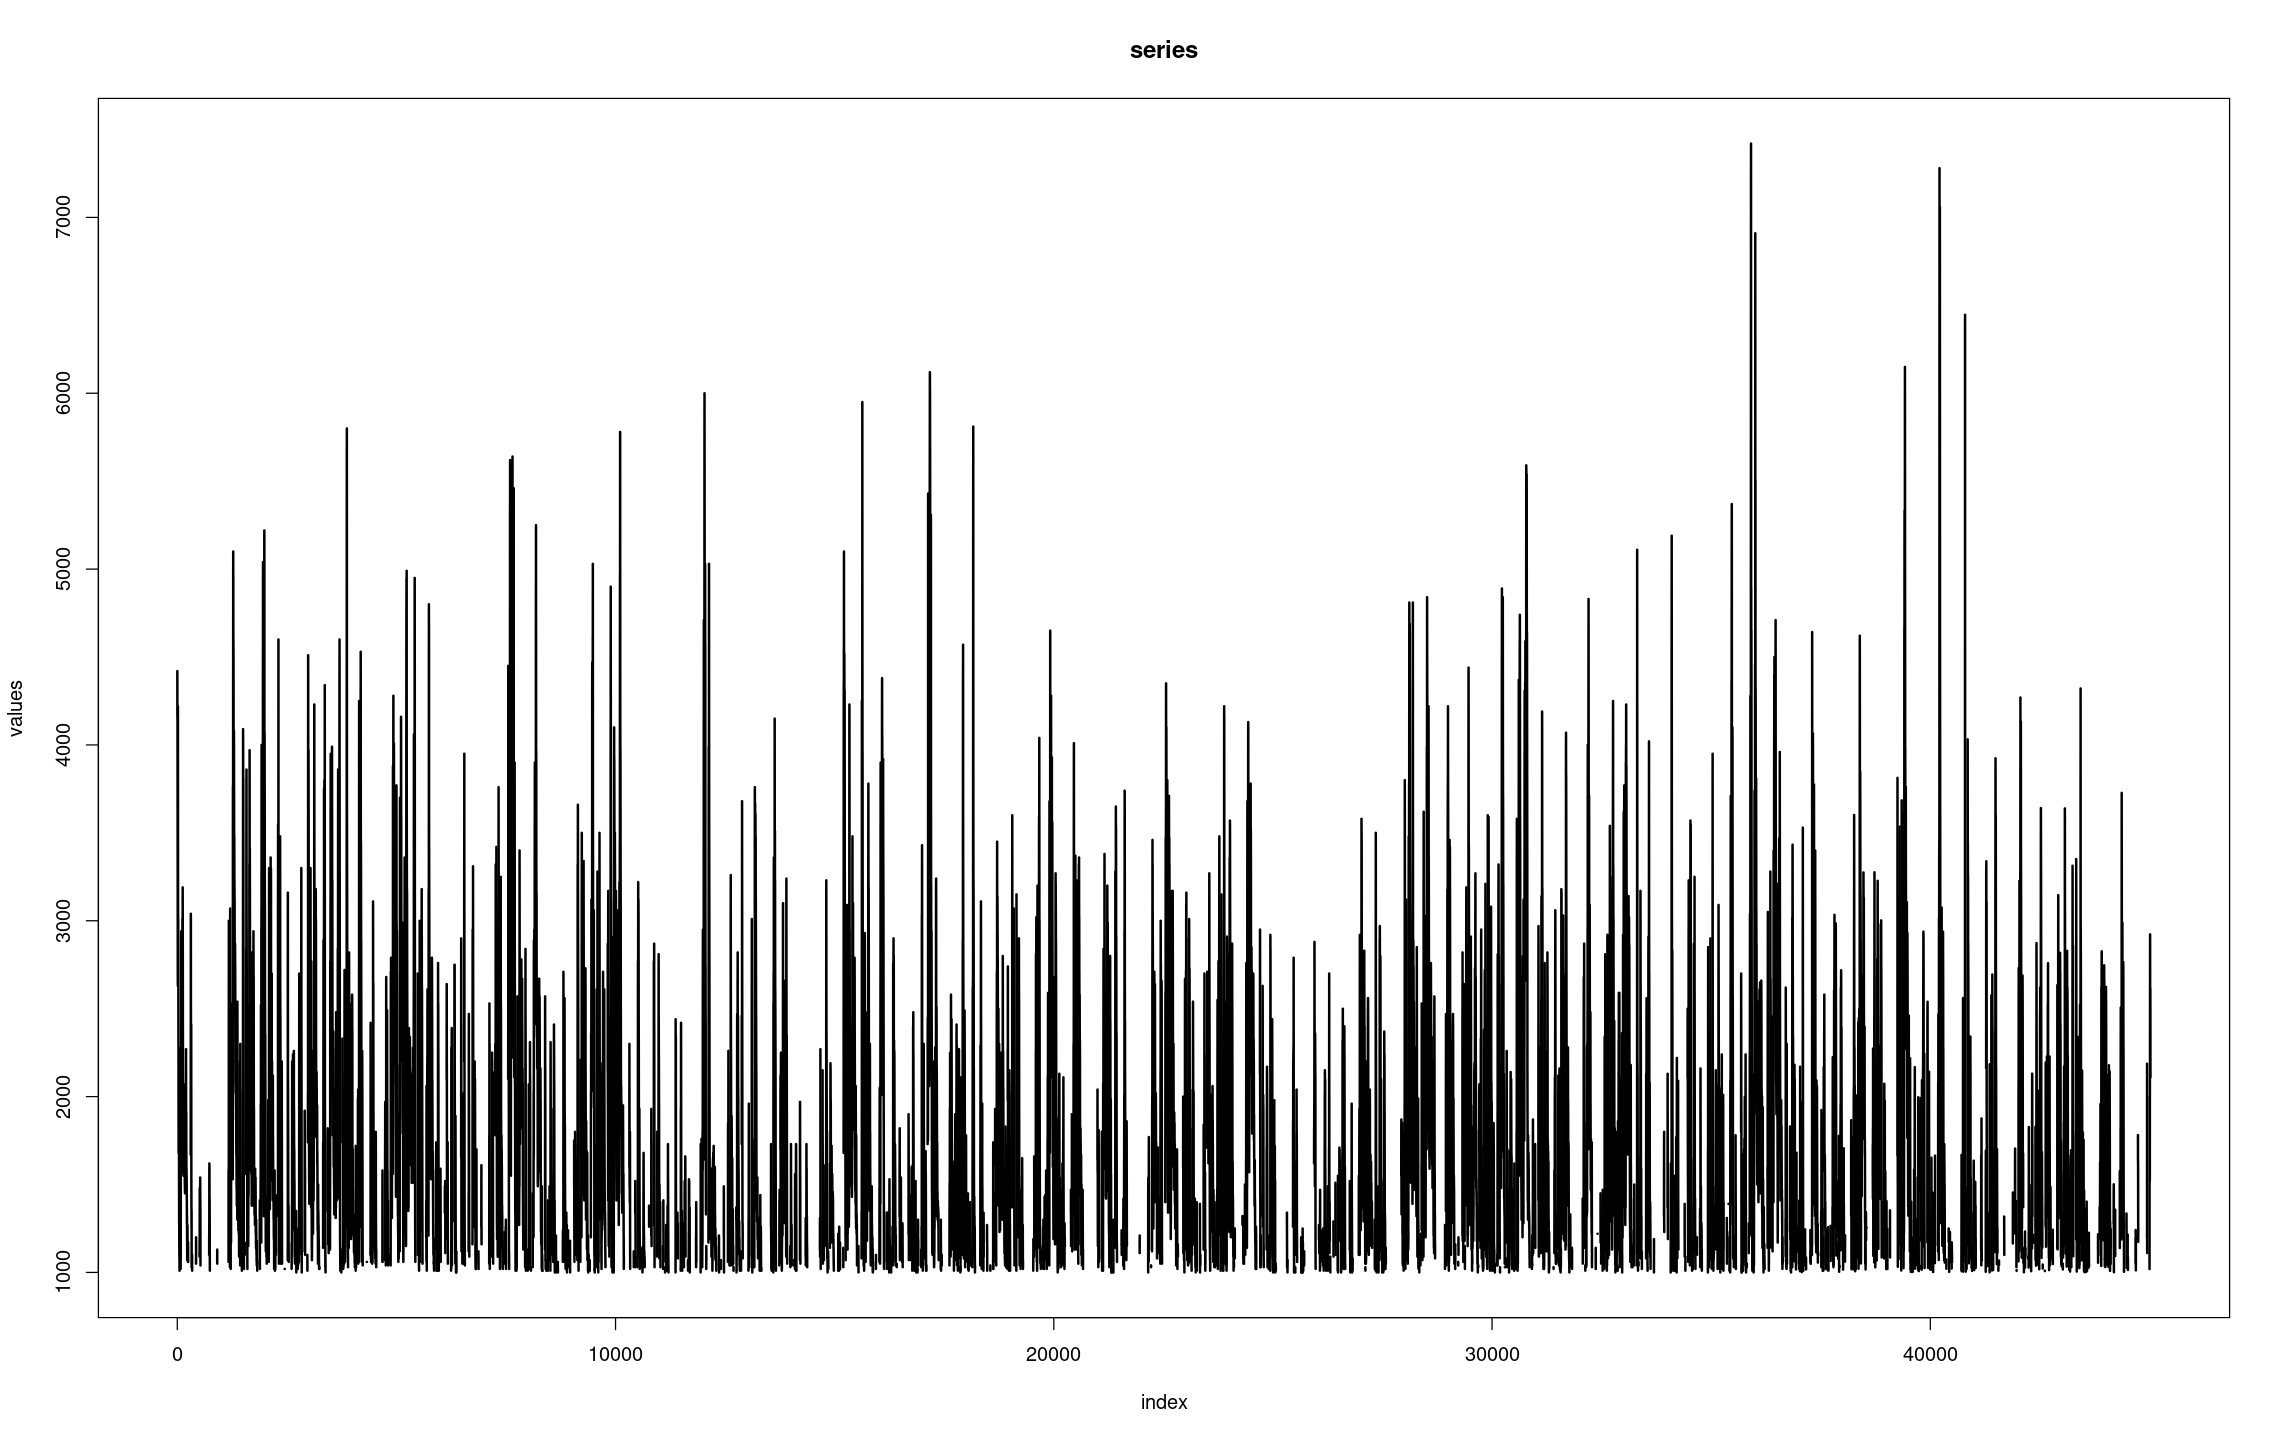

In [10]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)


In [11]:
x <- x_raw

------------------------------------------------------------------------------ 
x (numeric)

      length           n         NAs      unique          0s        mean'
      45'028      22'170      22'858       3'478           0  1'849.1337
                   49.2%       50.8%                    0.0%            
                                                                        
         .05         .10         .25      median         .75         .90
  1'047.4785  1'100.0000  1'260.0000  1'620.0000  2'210.0000  2'900.0000
                                                                        
       range          sd       vcoef         mad         IQR        skew
  6'420.0000    780.9616      0.4223    622.6920    950.0000      1.5818
                                                                        
      meanCI
  1'838.8531
  1'859.4143
            
         .95
  3'400.0000
            
        kurt
      3.2736
            
lowest : 1'000.0 (107), 1'000.2400, 1'000.2700

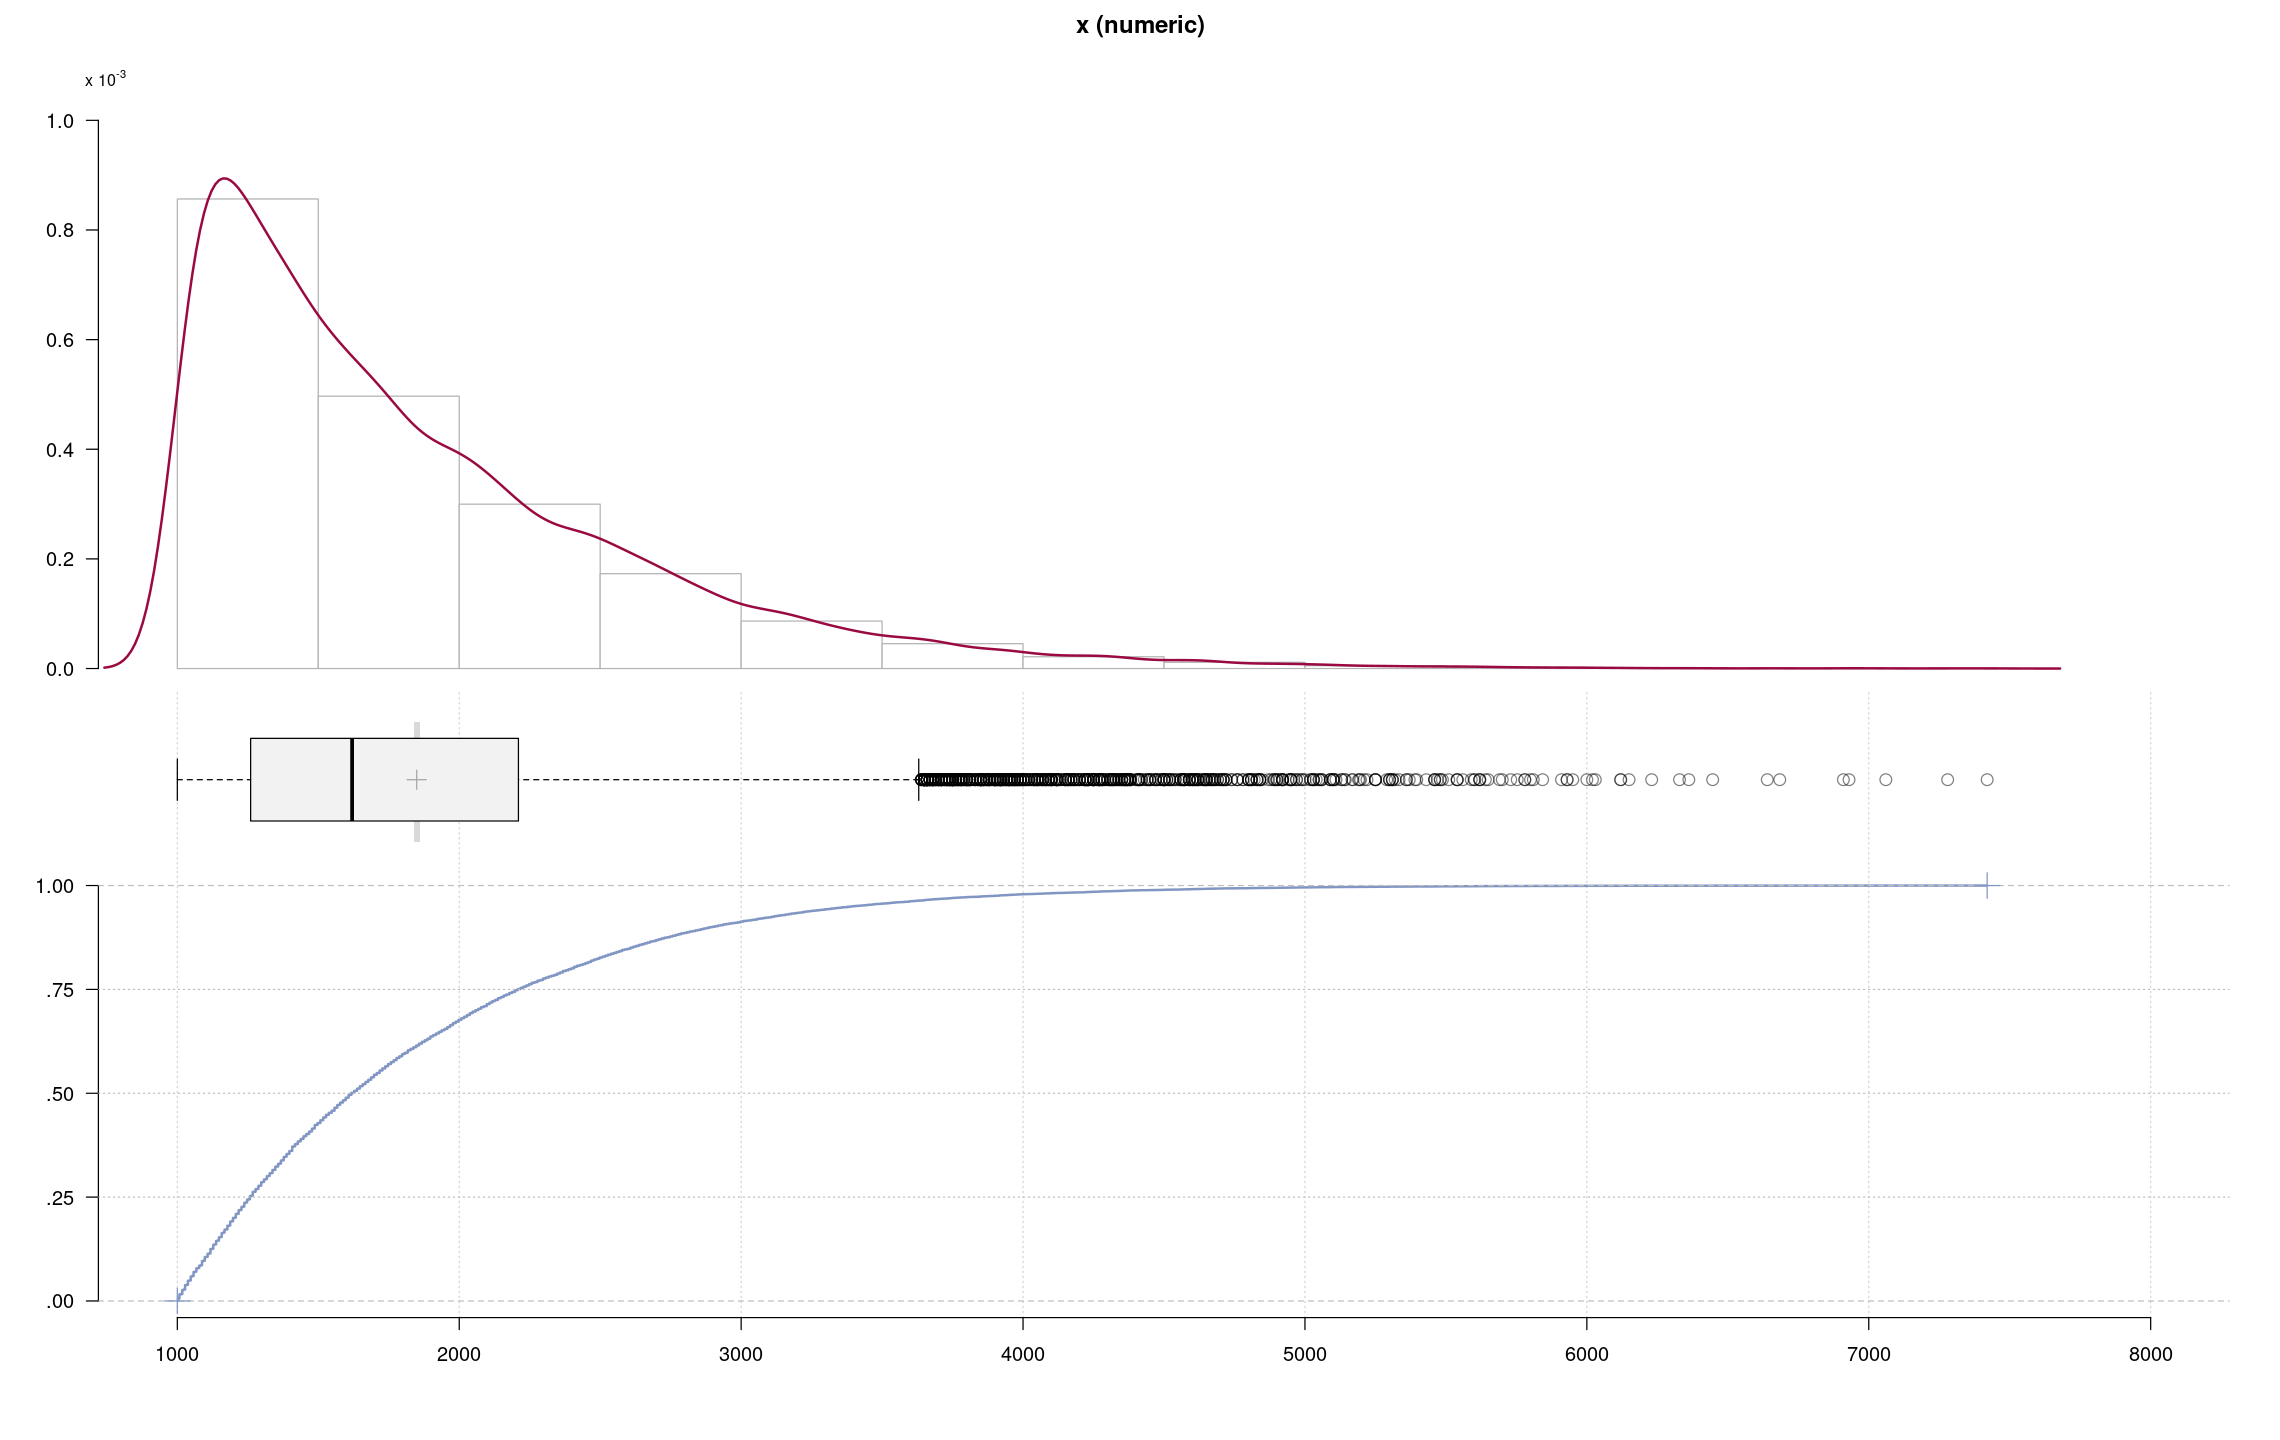

In [12]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [16]:
x <- x_raw[!is.na(x_raw)]
n <- length(x)

describe(x)

x 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   22170        0     3478        1     1849    811.5     1047     1100 
     .25      .50      .75      .90      .95 
    1260     1620     2210     2900     3400 

lowest : 1000    1000.24 1000.27 1000.47 1000.74
highest: 6910    6930    7060.54 7279.88 7420   

In [11]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# EVA: Stationary case

## Estimation

In [17]:
minimum_block_size <- find_minimum_block_size(x, threshold = NULL)

print(minimum_block_size)

[1] 1


In [18]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 443


In [19]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 1000


In [20]:
print(median(x))

[1] 1620


In [21]:
print(calculate_mode(x))

[1] 1162.142608


In [22]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = 0.089, m = 50)

print(candidate_block_sizes)

  [1]   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
 [19]  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
 [37]  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
 [55]  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
 [73]  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
 [91]  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
[109] 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
[127] 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
[145] 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
[163] 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
[181] 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
[199] 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
[217] 218 219 220 221 222 223 224 225 226 227 228 229 230 231 23

In [53]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])

In [54]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [55]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

       loc_star  scale_star      shape_star
113 1534.623818 802.6523469  0.011754420087
120 1279.369481 983.1913362 -0.051823020137
121 1588.466370 806.0434979 -0.009342895228
123 1594.886245 798.2373732 -0.006289113500
128 1543.045264 859.9142817 -0.026919545101
130 1368.714434 971.0841275 -0.057745642260
138 1583.500438 679.4028337  0.042669760382
142 1473.740912 908.4348120 -0.044396514717
158 1570.807170 647.5429800  0.051853959707


In [56]:
print(gev_mixture_model_object$weights)

           113            120            121            123            128 
0.001261431725 0.001051193104 0.015347419321 0.284768211921 0.115631241459 
           130            138            142            158 
0.037632713129 0.104068117313 0.013770629665 0.426469042363 


In [57]:
print(which.max(gev_mixture_model_object$weights))

158 
  9 


In [58]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 9


In [59]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 9


In [60]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 6


In [61]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
417874.2845 418154.5118 


In [62]:
print(gev_mixture_model_object$threshold)

[1] 1759.47


In [63]:
print(gev_mixture_model_object$equivalent_block_sizes)

  [1] 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 [19] 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 [37] 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 [55] 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 [73] 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 [91] 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
[109] 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
[127] 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
[145] 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
[163] 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
[181] 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
[199] 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
[217] 329 330 331 332 333 334 335 336 337 338 339 340 341 342 34

In [64]:
print(gev_mixture_model_object$extremal_indexes)

          113           120           121           123           128 
0.07232979040 0.07335204043 0.07843566832 0.07335204043 0.07335204043 
          130           138           142           158 
0.07335204043 0.09816706685 0.07335204043 0.11196398688 


## Diagnostic

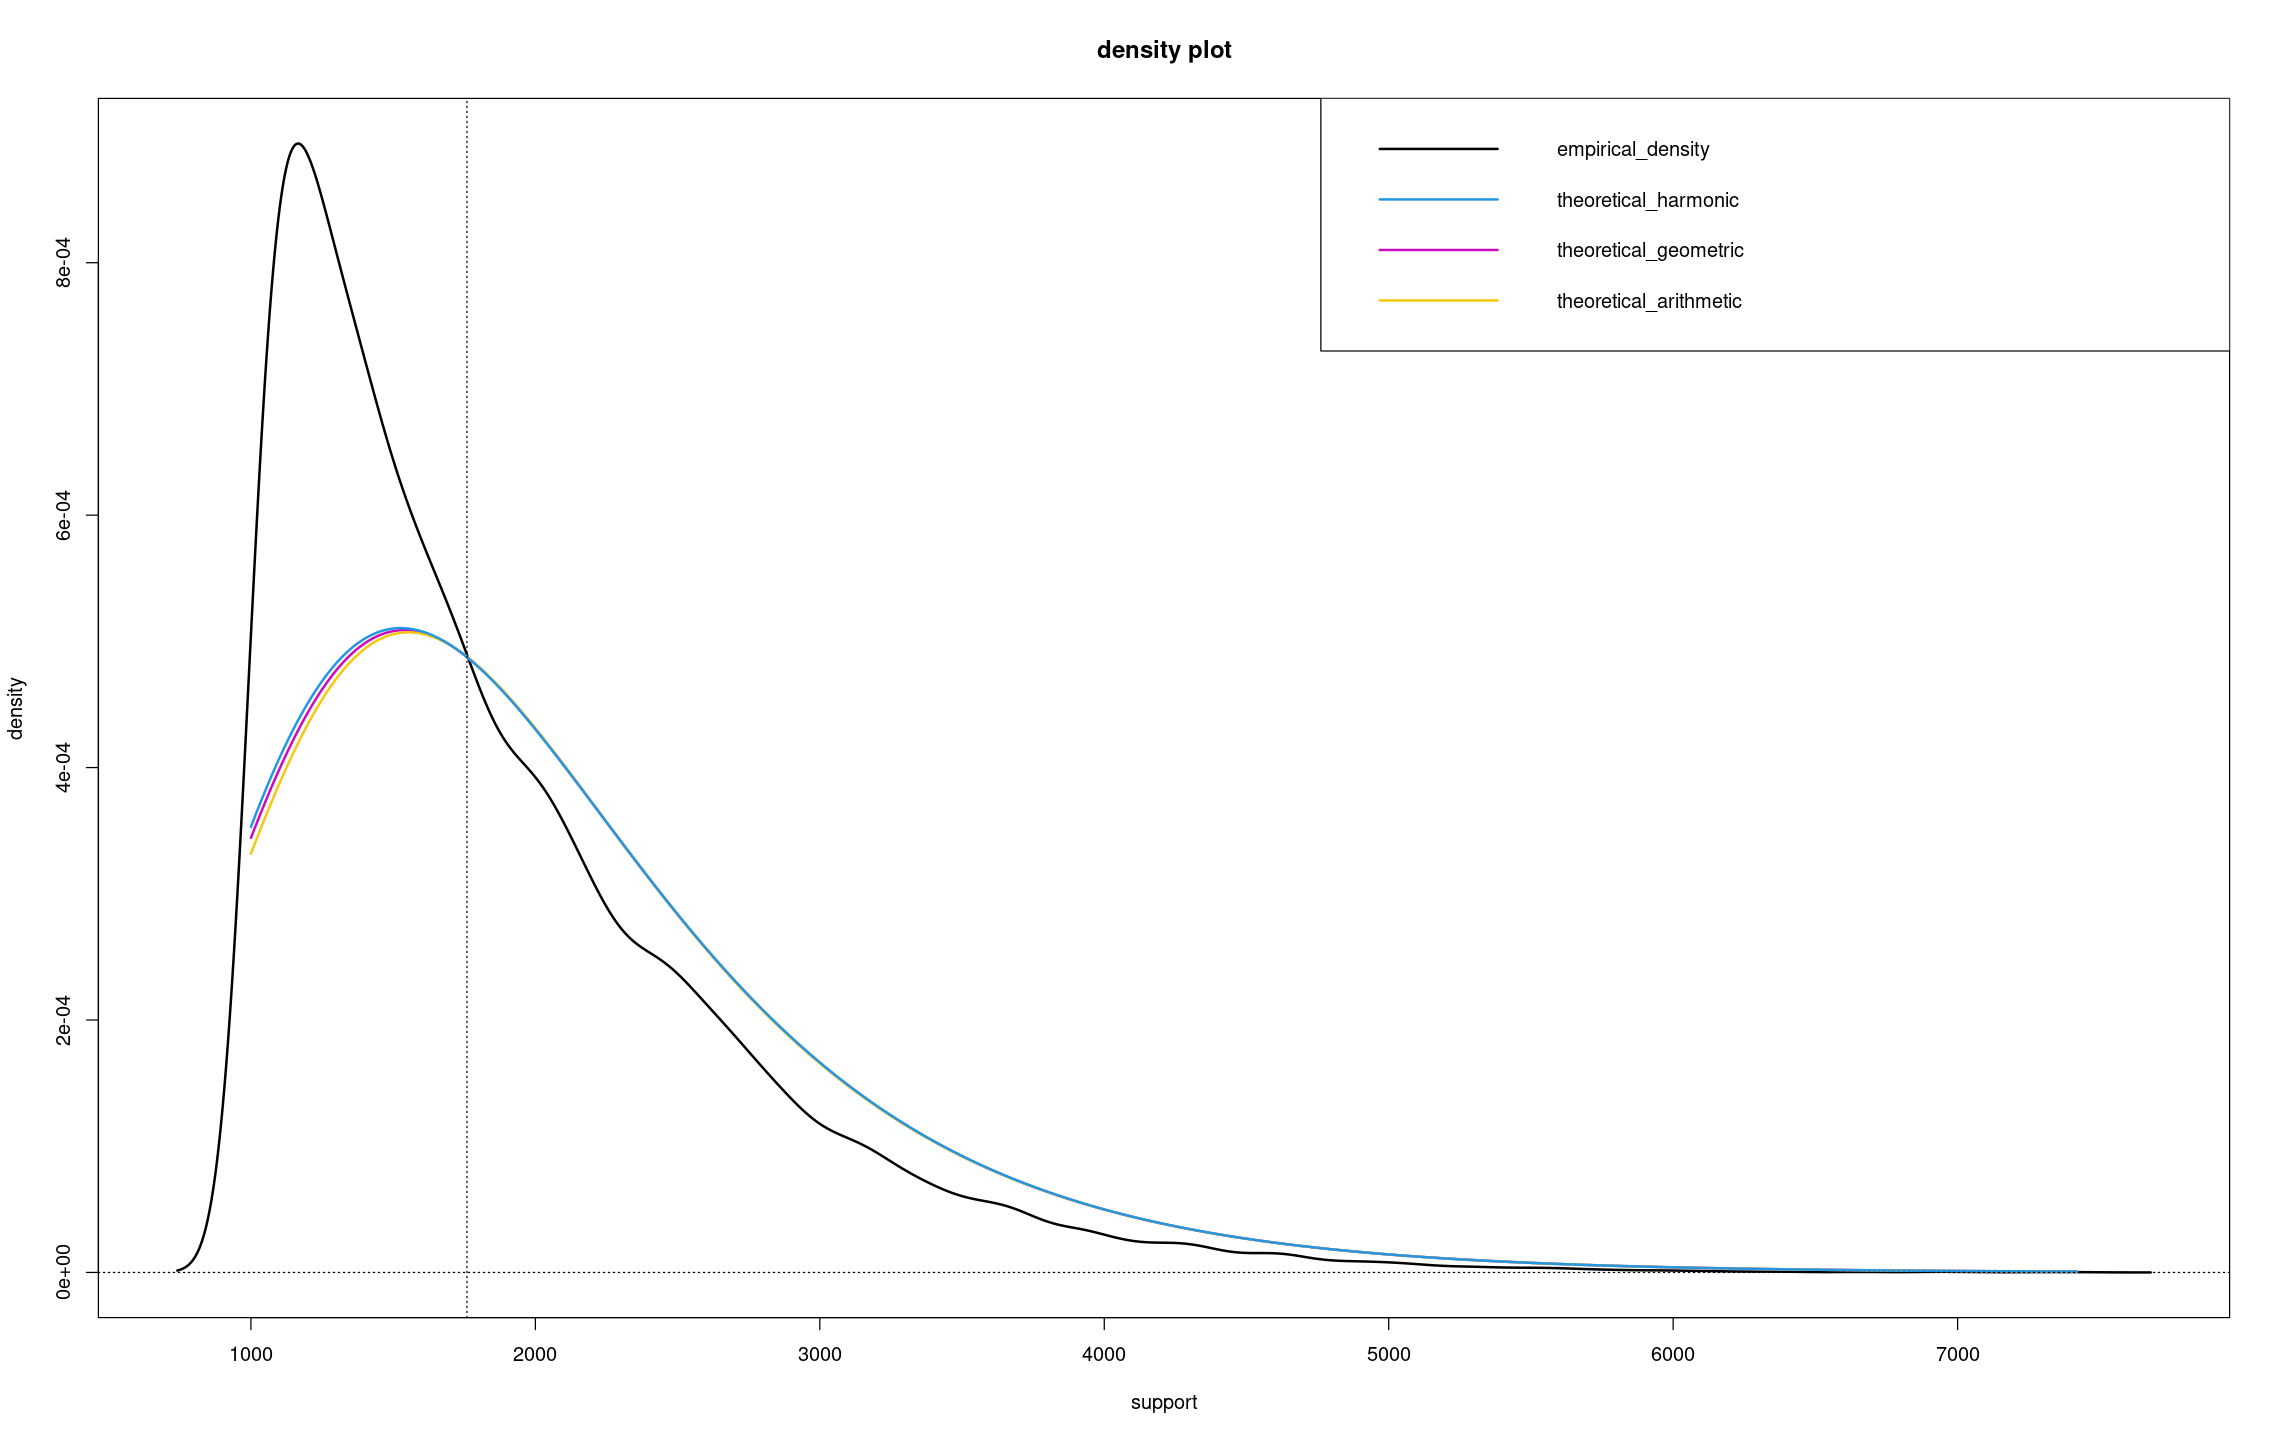

In [65]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

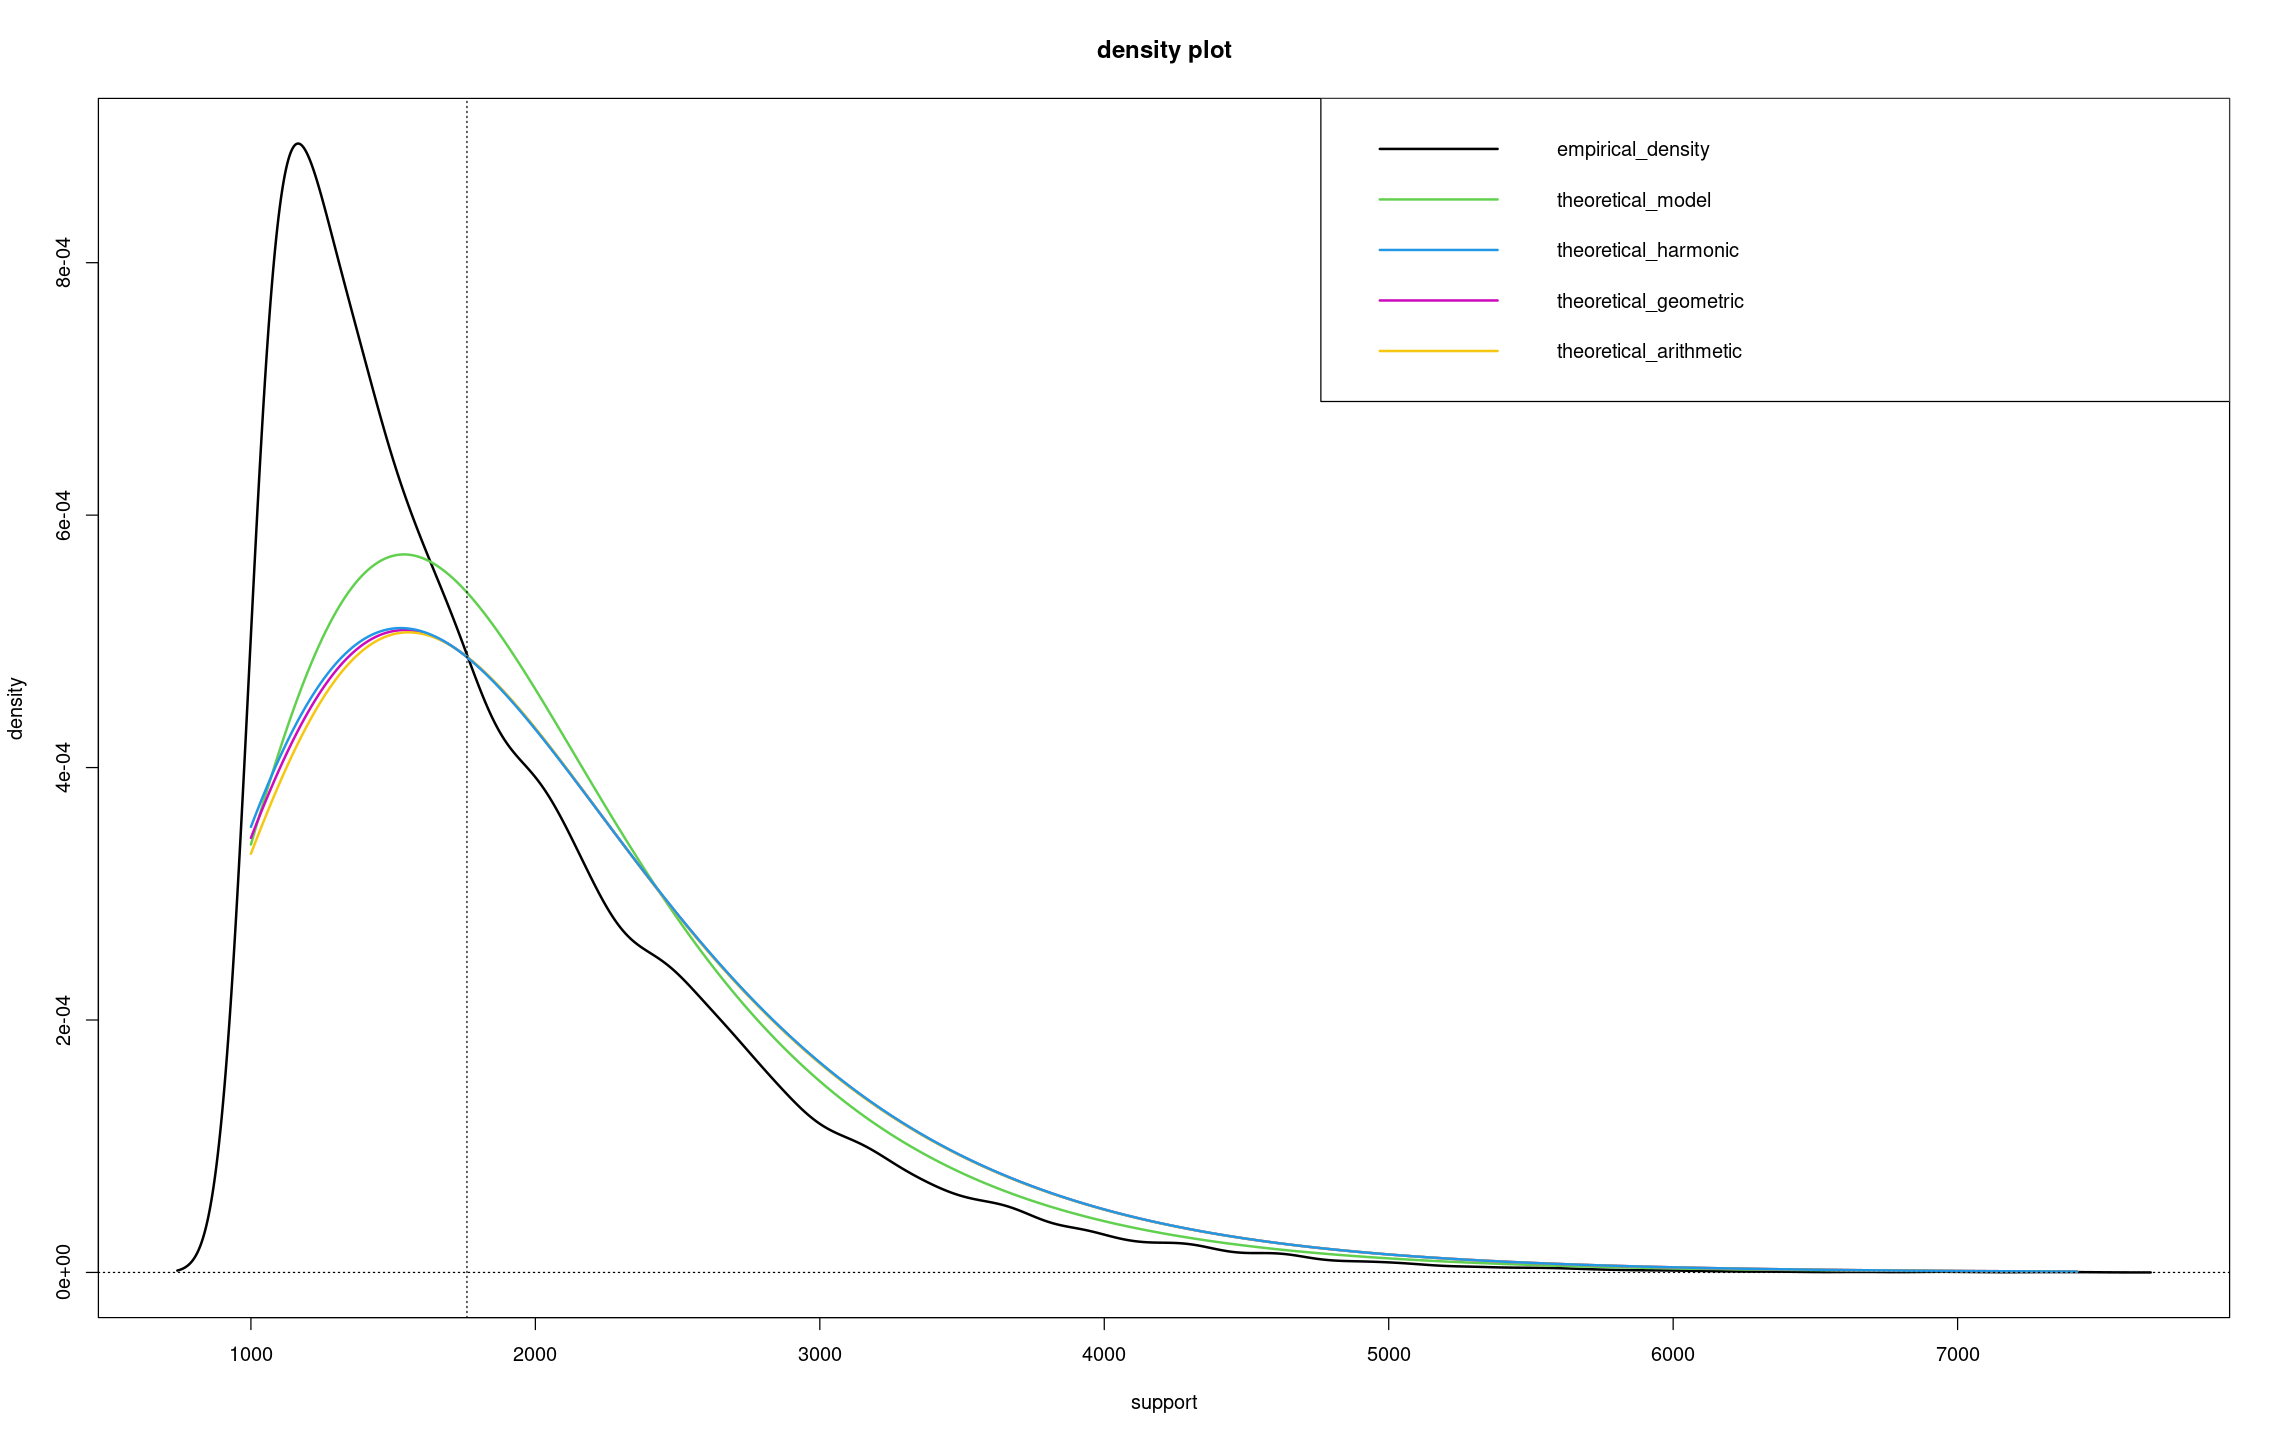

In [66]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

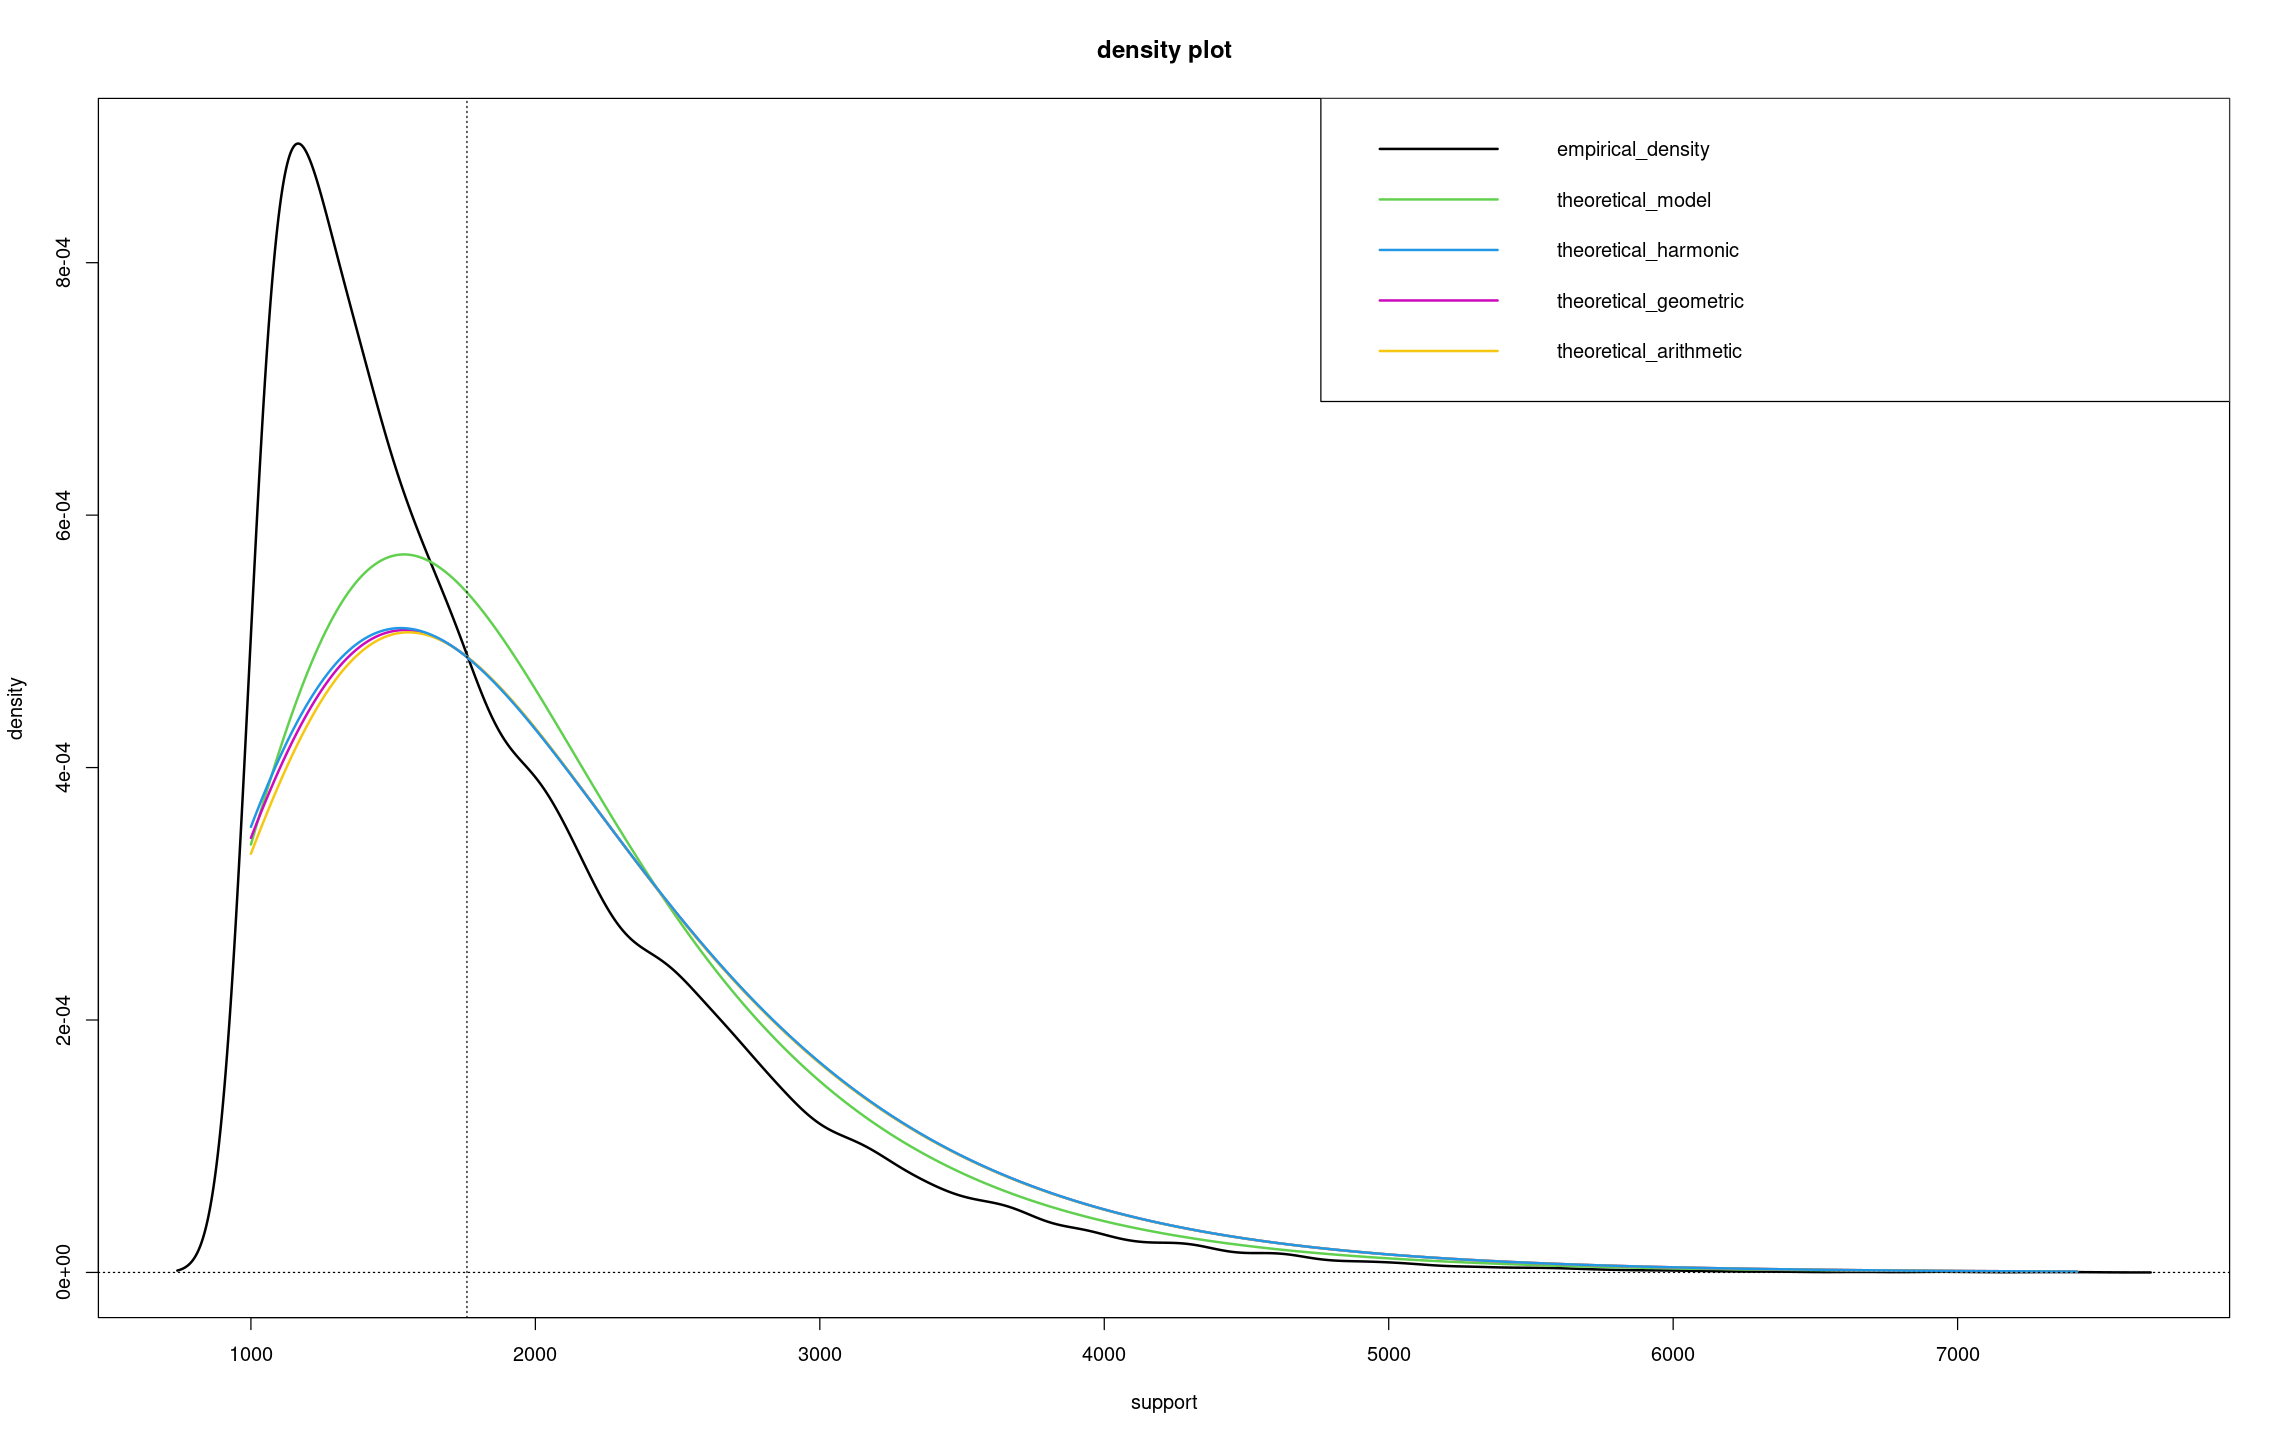

In [67]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

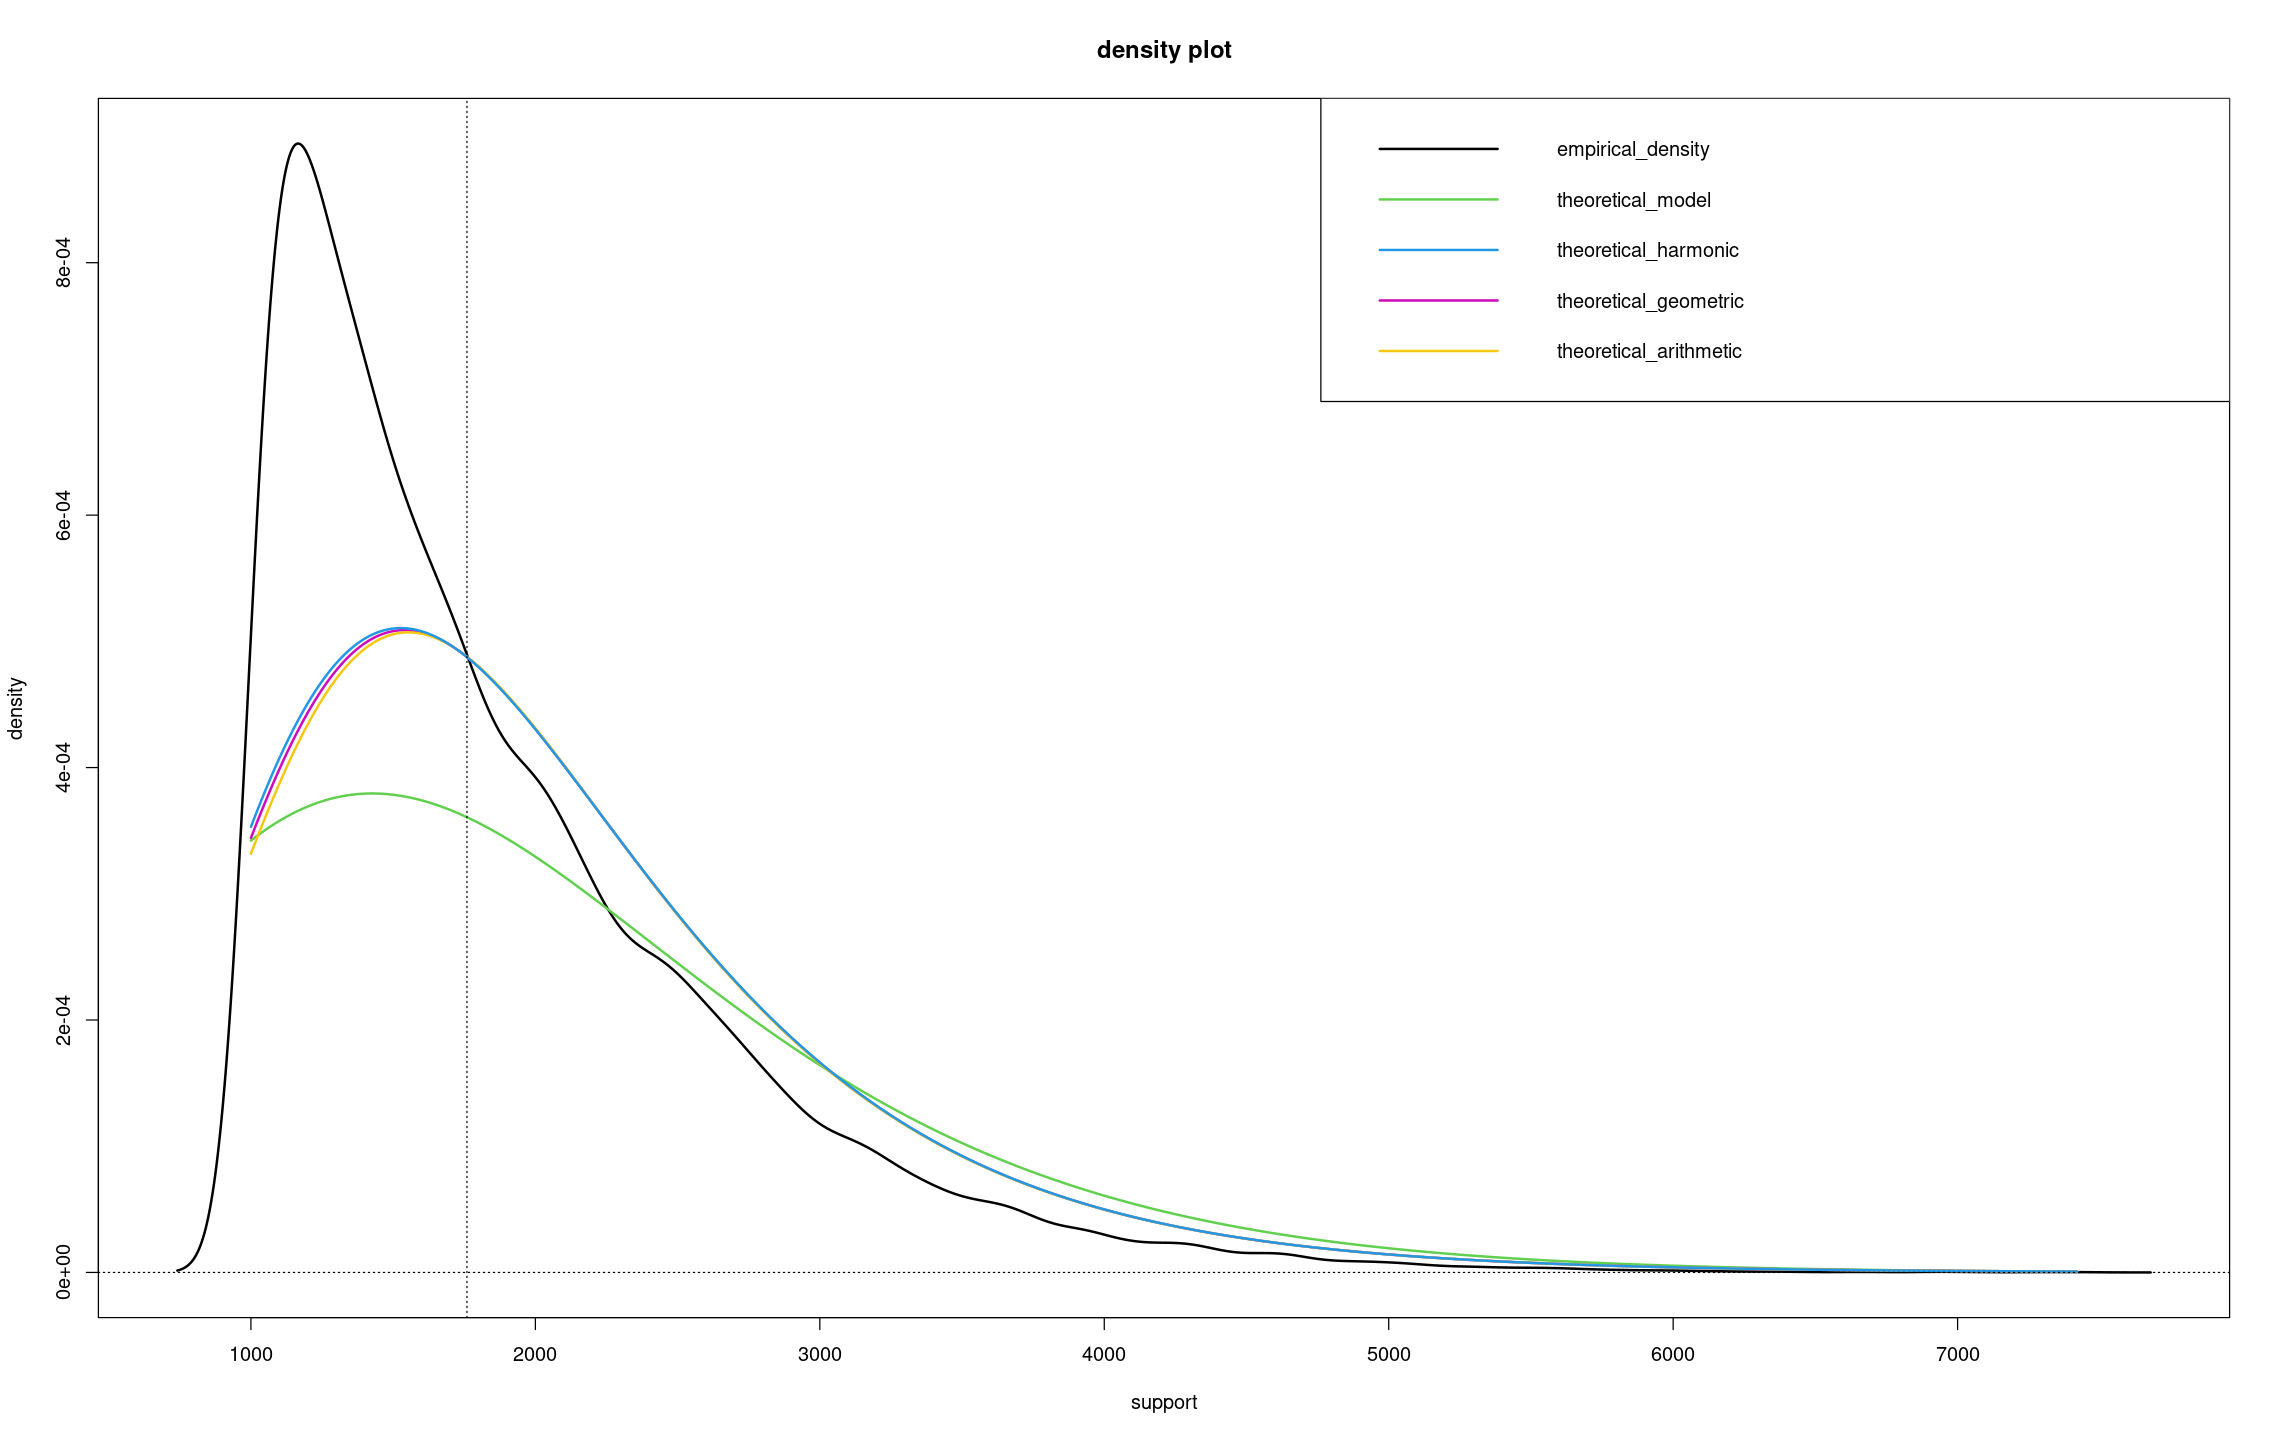

In [68]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

## Quantiles

In [69]:
m <- 366*10000

In [70]:
alpha <- m^(-1)

alpha

[1] 2.732240437e-07

In [43]:
alpha <- n^(-2)

print(alpha)

[1] 8.888221364e-09


In [44]:
true_quantile <- NULL

print(true_quantile)

NULL


In [71]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
113,3538.0292895,14809.27936,26080.52943
120,5125.7490036,11582.36383,18038.97865
121,4554.1889932,12949.25722,21344.32544
123,4290.5411246,13103.06531,21915.58949
128,4949.8249384,12217.99301,19486.16109
130,4675.7619646,11159.19449,17642.62702
138,-397.7211485,15957.22923,32312.17961
142,5045.9568784,11459.92408,17873.89129
158,-1786.4045111,16458.56940,34703.54330


In [72]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
113,3538.0292895,14809.27936,26080.52943
120,5125.7490036,11582.36383,18038.97865
121,4554.1889932,12949.25722,21344.32544
123,4290.5411246,13103.06531,21915.58949
128,4949.8249384,12217.99301,19486.16109
130,4675.7619646,11159.19449,17642.62702
138,-397.7211485,15957.22923,32312.17961
142,5045.9568784,11459.92408,17873.89129
158,-1786.4045111,16458.56940,34703.54330


In [73]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
113,3538.0292895,14809.27936,26080.52943
120,5125.7490036,11582.36383,18038.97865
121,4554.1889932,12949.25722,21344.32544
123,4290.5411246,13103.06531,21915.58949
128,4949.8249384,12217.99301,19486.16109
130,4675.7619646,11159.19449,17642.62702
138,-397.7211485,15957.22923,32312.17961
142,5045.9568784,11459.92408,17873.89129
158,-1786.4045111,16458.56940,34703.54330


In [74]:
options(repr.plot.width=23, repr.plot.height=6)

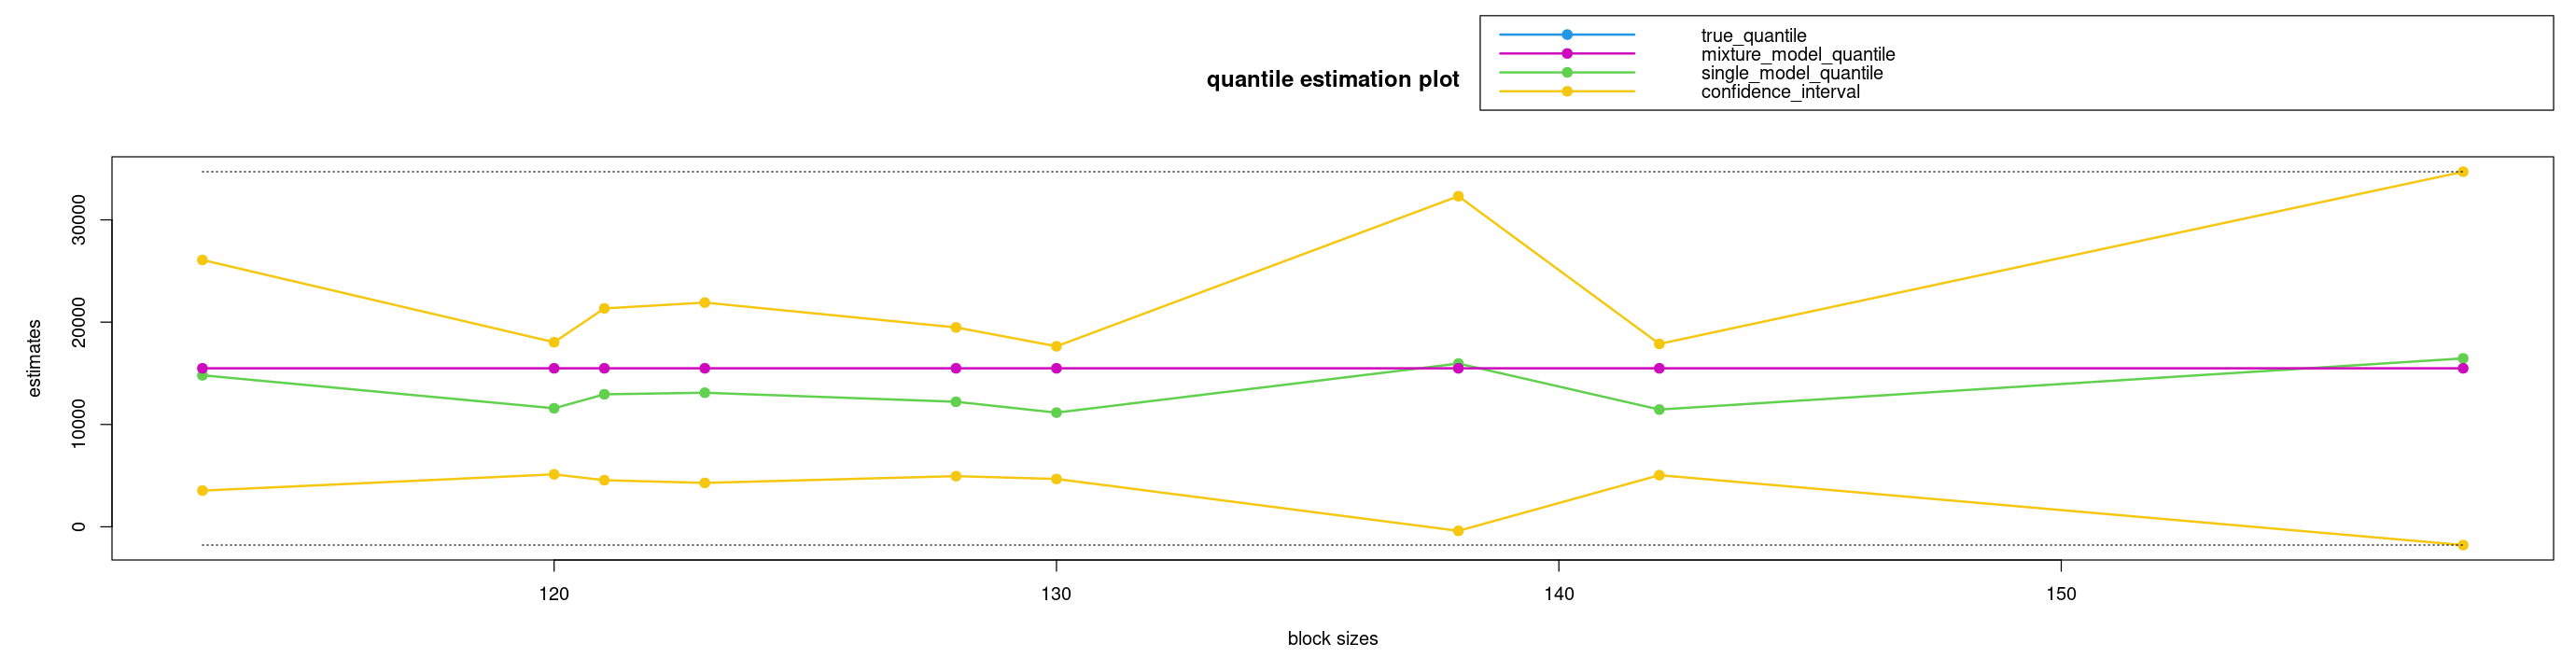

In [75]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")